In [1]:
import sys

sys.path.append("../")  # go to parent dir

%load_ext autoreload
%autoreload 2

import pyfftw

import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from ddmtools.analysis import DDM
from ddmtools.frame import Framestack
from ddmtools.types import IntensiveParameters

project_path = (Path(".") / "..").resolve()
data_path = project_path / "data"
# experiment_path = data_path / "2BD01_1__middle1"

In [2]:
CROP_SIZE = (512, 512)

stack = Framestack.from_video(data_path / "0_5um.mp4", CROP_SIZE)

intensive_parameters = IntensiveParameters(
    framerate=30,
    temperature=300,
    micrometre_per_pixel=0.0969,
    viscosity=1e-3,
)

ddm = DDM(stack=stack, intensive_parameters=intensive_parameters)

# Preload
ddm.stack.load()

  0%|          | 0/541 [00:00<?, ?it/s]

[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!
[h264 @ 0x5555e7f73940] no frame!


Text(0.5, 0.98, 'Frame 1 - Frame 2')

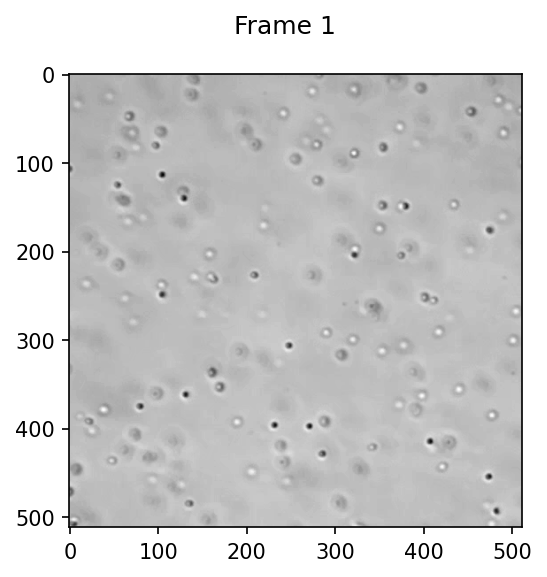

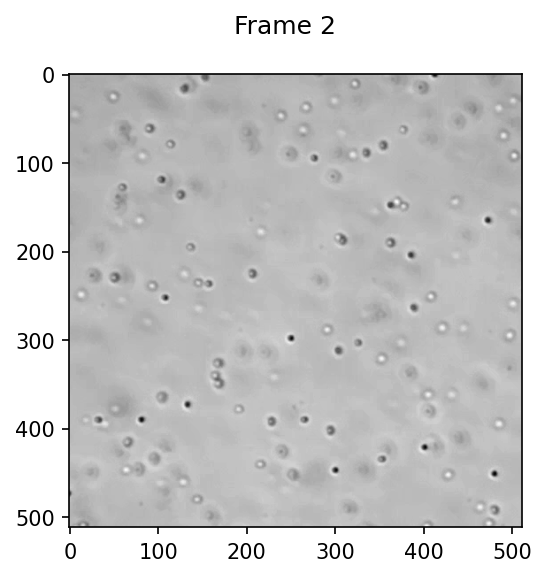

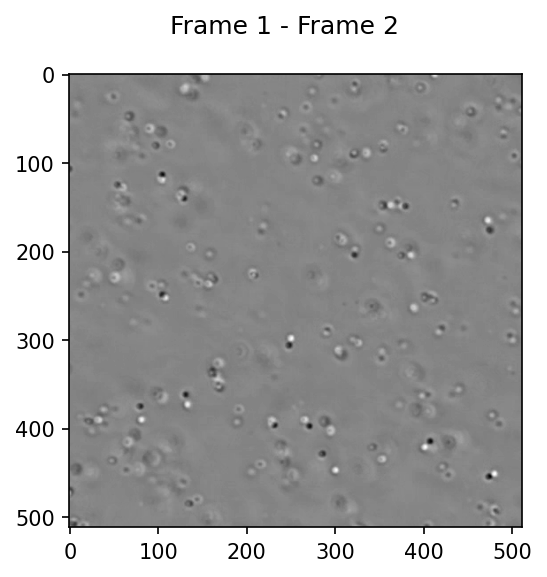

In [3]:
frame1 = ddm.stack[10]
frame2 = ddm.stack[20]

fig = plt.figure(dpi=150)
plt.imshow(frame1, plt.cm.gray)
fig.suptitle("Frame 1")

fig = plt.figure(dpi=150)
plt.imshow(frame2, plt.cm.gray)
fig.suptitle("Frame 2")

fig = plt.figure(dpi=150)
plt.imshow(frame1 - frame2, plt.cm.gray)
fig.suptitle("Frame 1 - Frame 2")

Text(0.5, 0.98, 'Differential Spectrum')

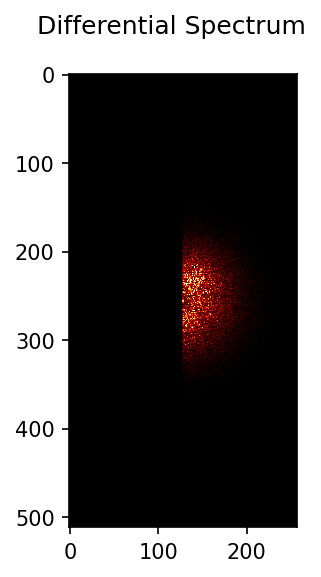

In [4]:
# Show a differential spectrum
diff = ddm.get_differential_spectrum(10, 20)
fig = ddm.plot_differential_spectrum(diff, 3)
fig.set_dpi(150)
fig.suptitle("Differential Spectrum")

Text(0.5, 0.98, 'Frame 1, Time averaged signal')

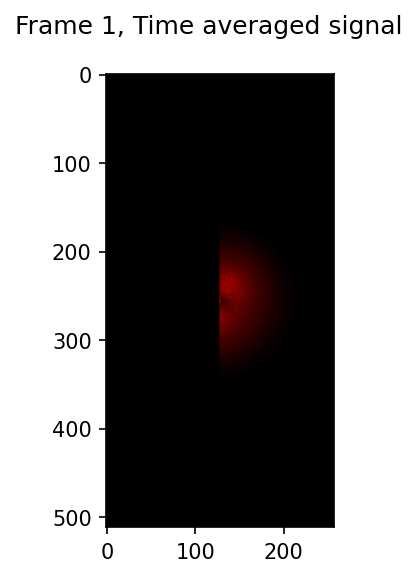

In [5]:
# Show time average
average = ddm.get_time_average(10, max_couples=100)

fig = ddm.plot_time_average(average, brightness=1.0)
fig.set_dpi(150)
fig.suptitle("Frame 1, Time averaged signal")

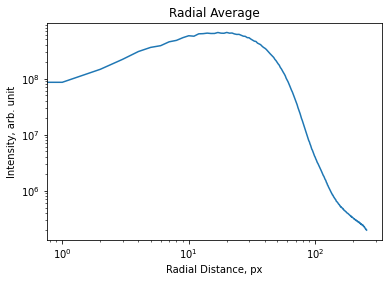

In [6]:
# Show radial average
# We can radially average since we expect isotropy
average = ddm.get_time_average(10, max_couples=100)

rad_average = ddm.get_radial_average(average)
fig = ddm.plot_radial_average(rad_average)
fig.set_dpi(150)

In [7]:
# taus = ddm.get_log_spaced_taus(150)
# taus = np.array(range(len(ddm.stack)))
taus = np.array(range(len(ddm.stack) - 10)) + 1
analysis = ddm.run(taus, max_couples=50)

  0%|          | 0/530 [00:00<?, ?it/s]

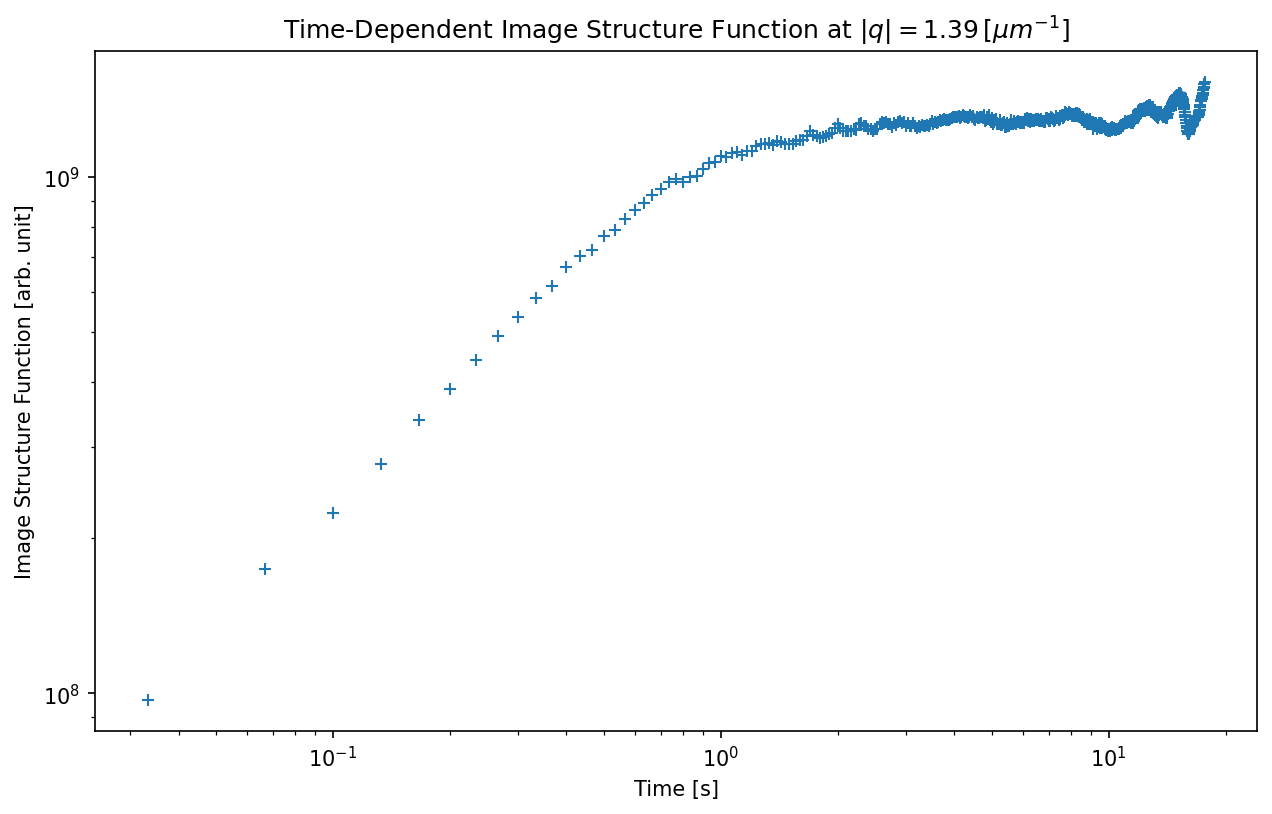

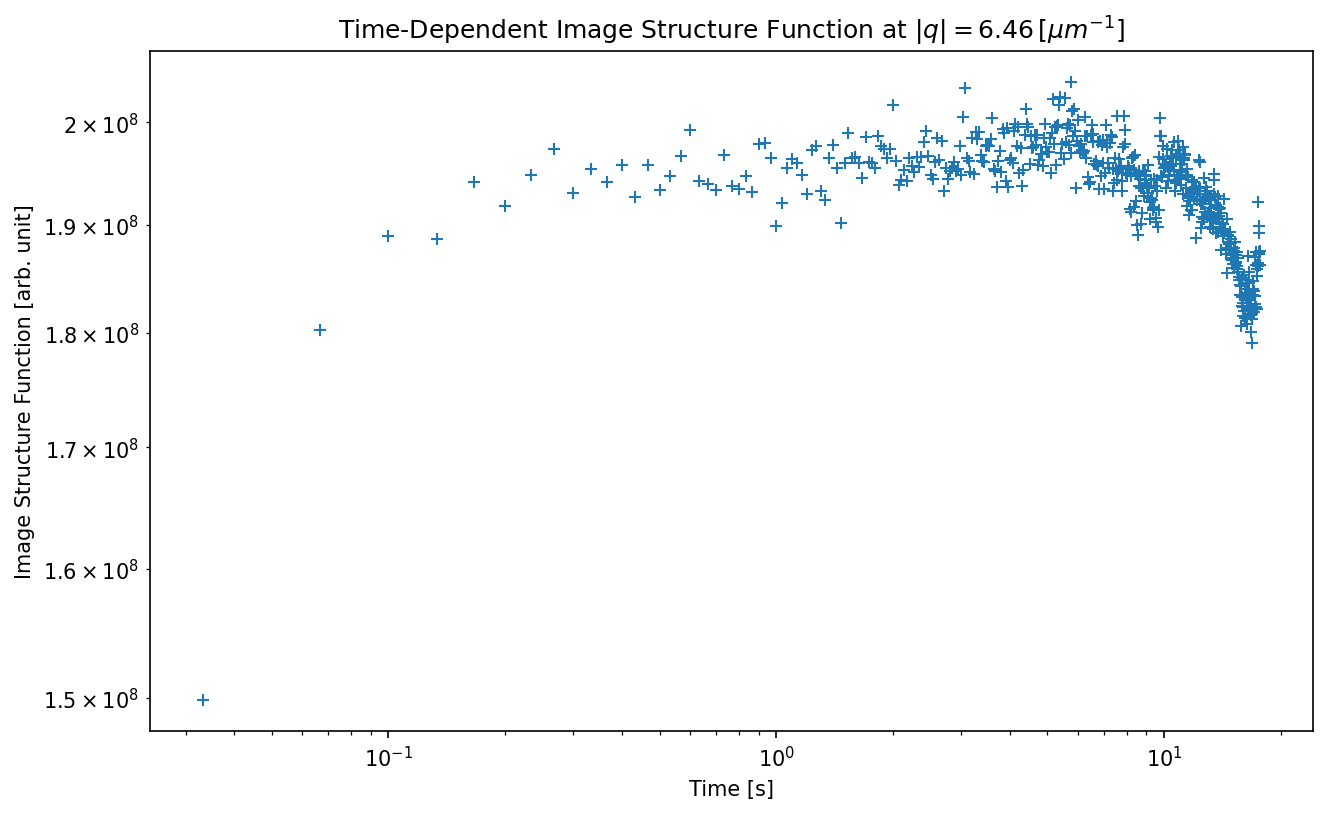

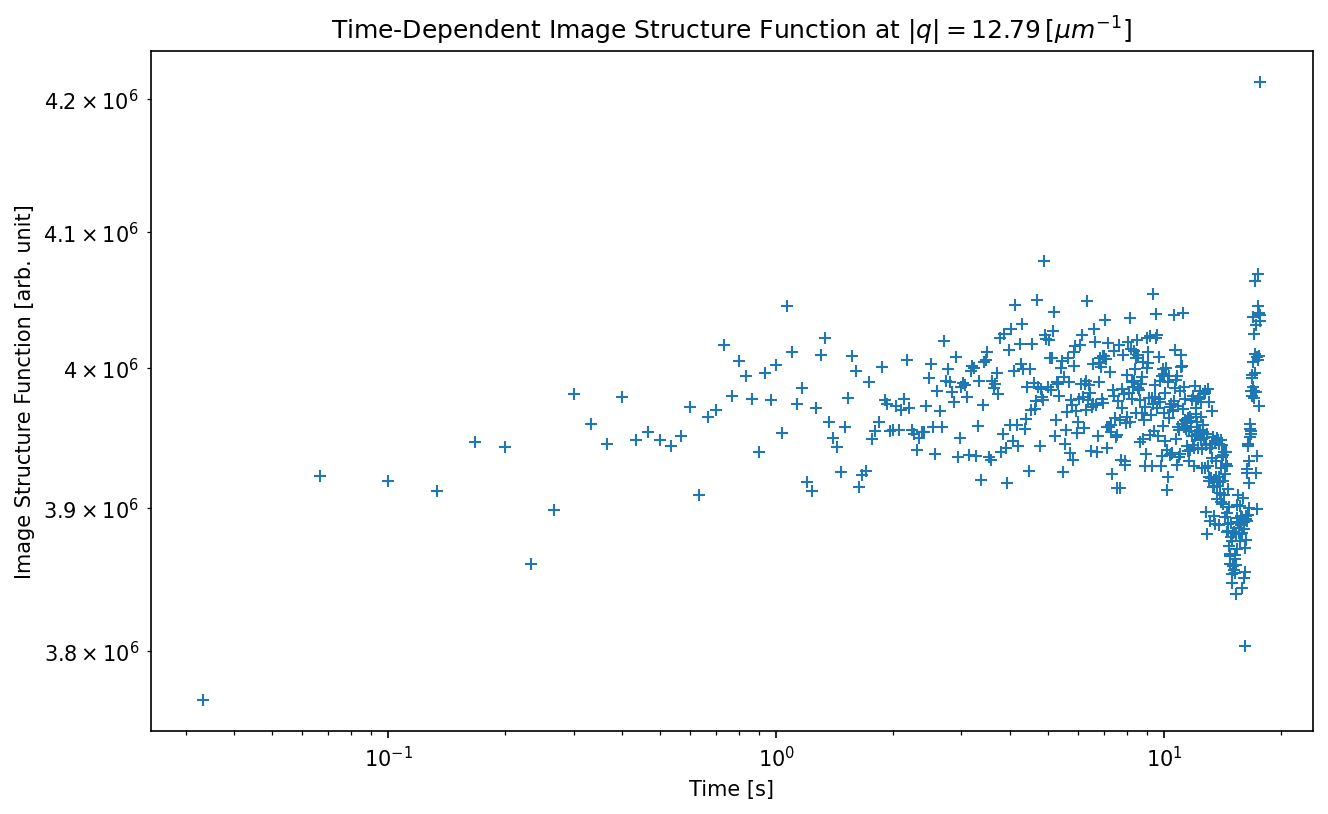

In [8]:
fig = analysis.plot_image_structure_function(10)
fig = analysis.plot_image_structure_function(50)
fig = analysis.plot_image_structure_function(100)

In [21]:
dispersity_order = 2
stack.unload()
min_result = analysis.fit_image_structure_functions_polydisperse(
    dispersity_order, method_sequence=["least_squares"], max_nfev=50_000
)


print(f"Objective function evaluations: {min_result.minimizer_result.nfev}")

  0%|          | 0/50000 [00:00<?, ?it/s]

Doing fit 1/1 using method `least_squares`...
Done.
Objective function evaluations: 3


/home/jeppe/Code/DDMTools/ddmtools/analysis.py:700: UserWarning: Was unable to estimate errors. Likely not enough data.
  warnings.warn("Was unable to estimate errors. Likely not enough data.")


In [10]:
# min_result.minimizer_result  # Warning: very verbose

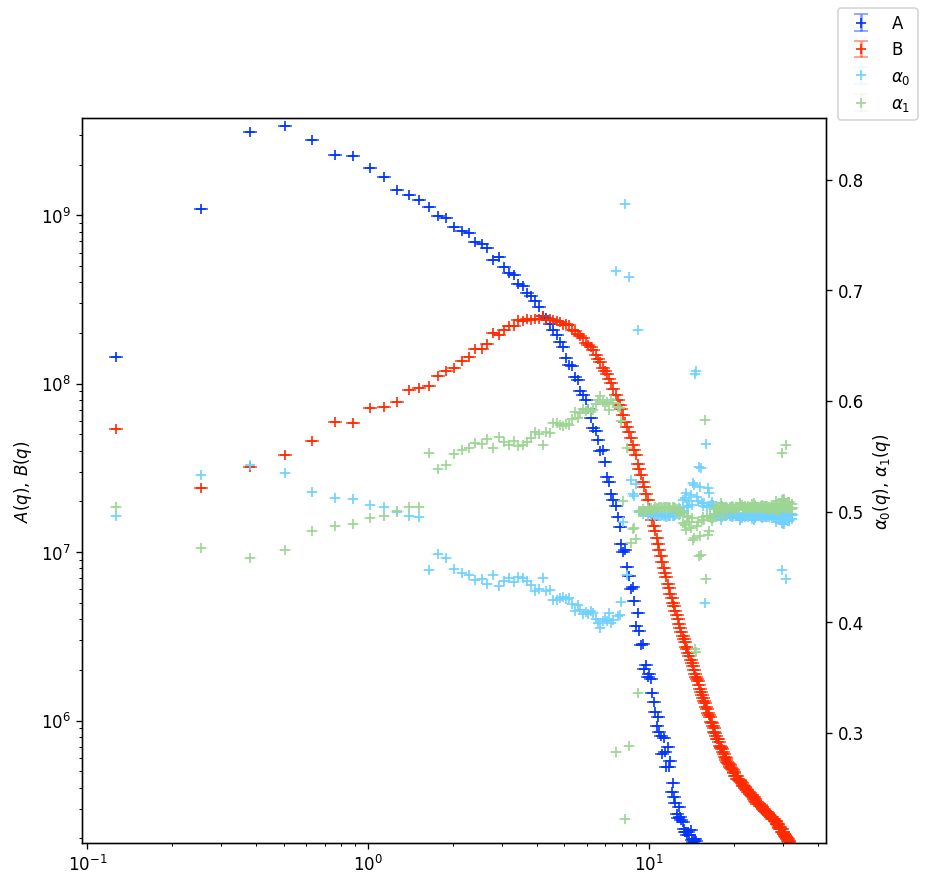

In [22]:
fig = min_result.plot_image_structure_function_params()

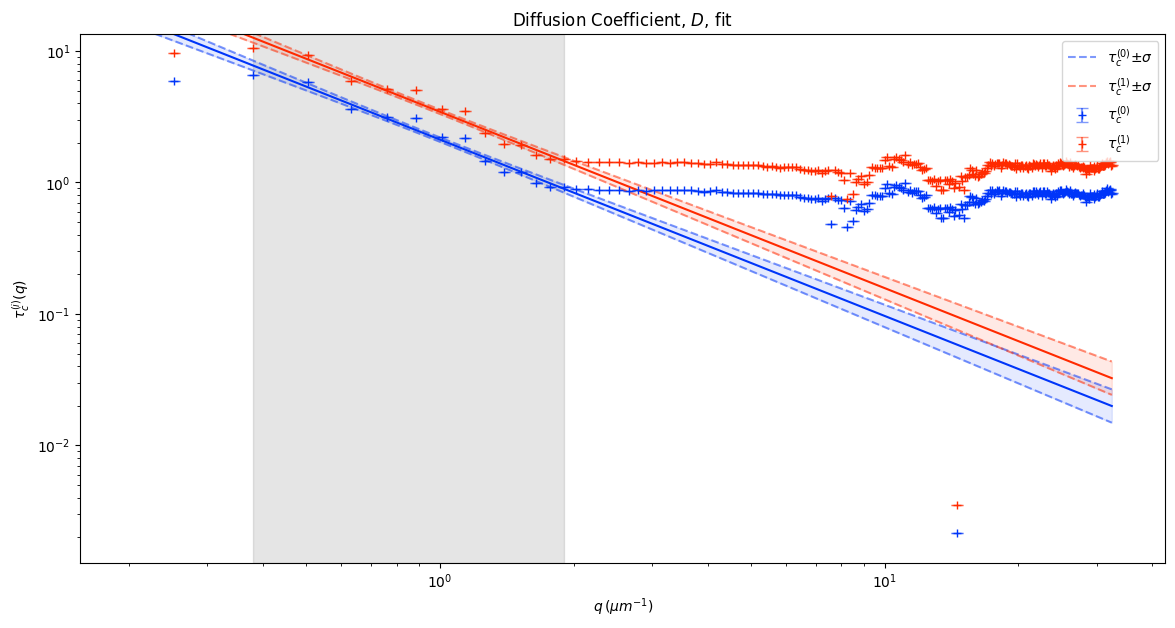

In [23]:
fit_result = min_result.fit_diffusion_coefficients(minimal_r_squared=0.97)
fig = fit_result.plot_diffusion_coeff_fit()

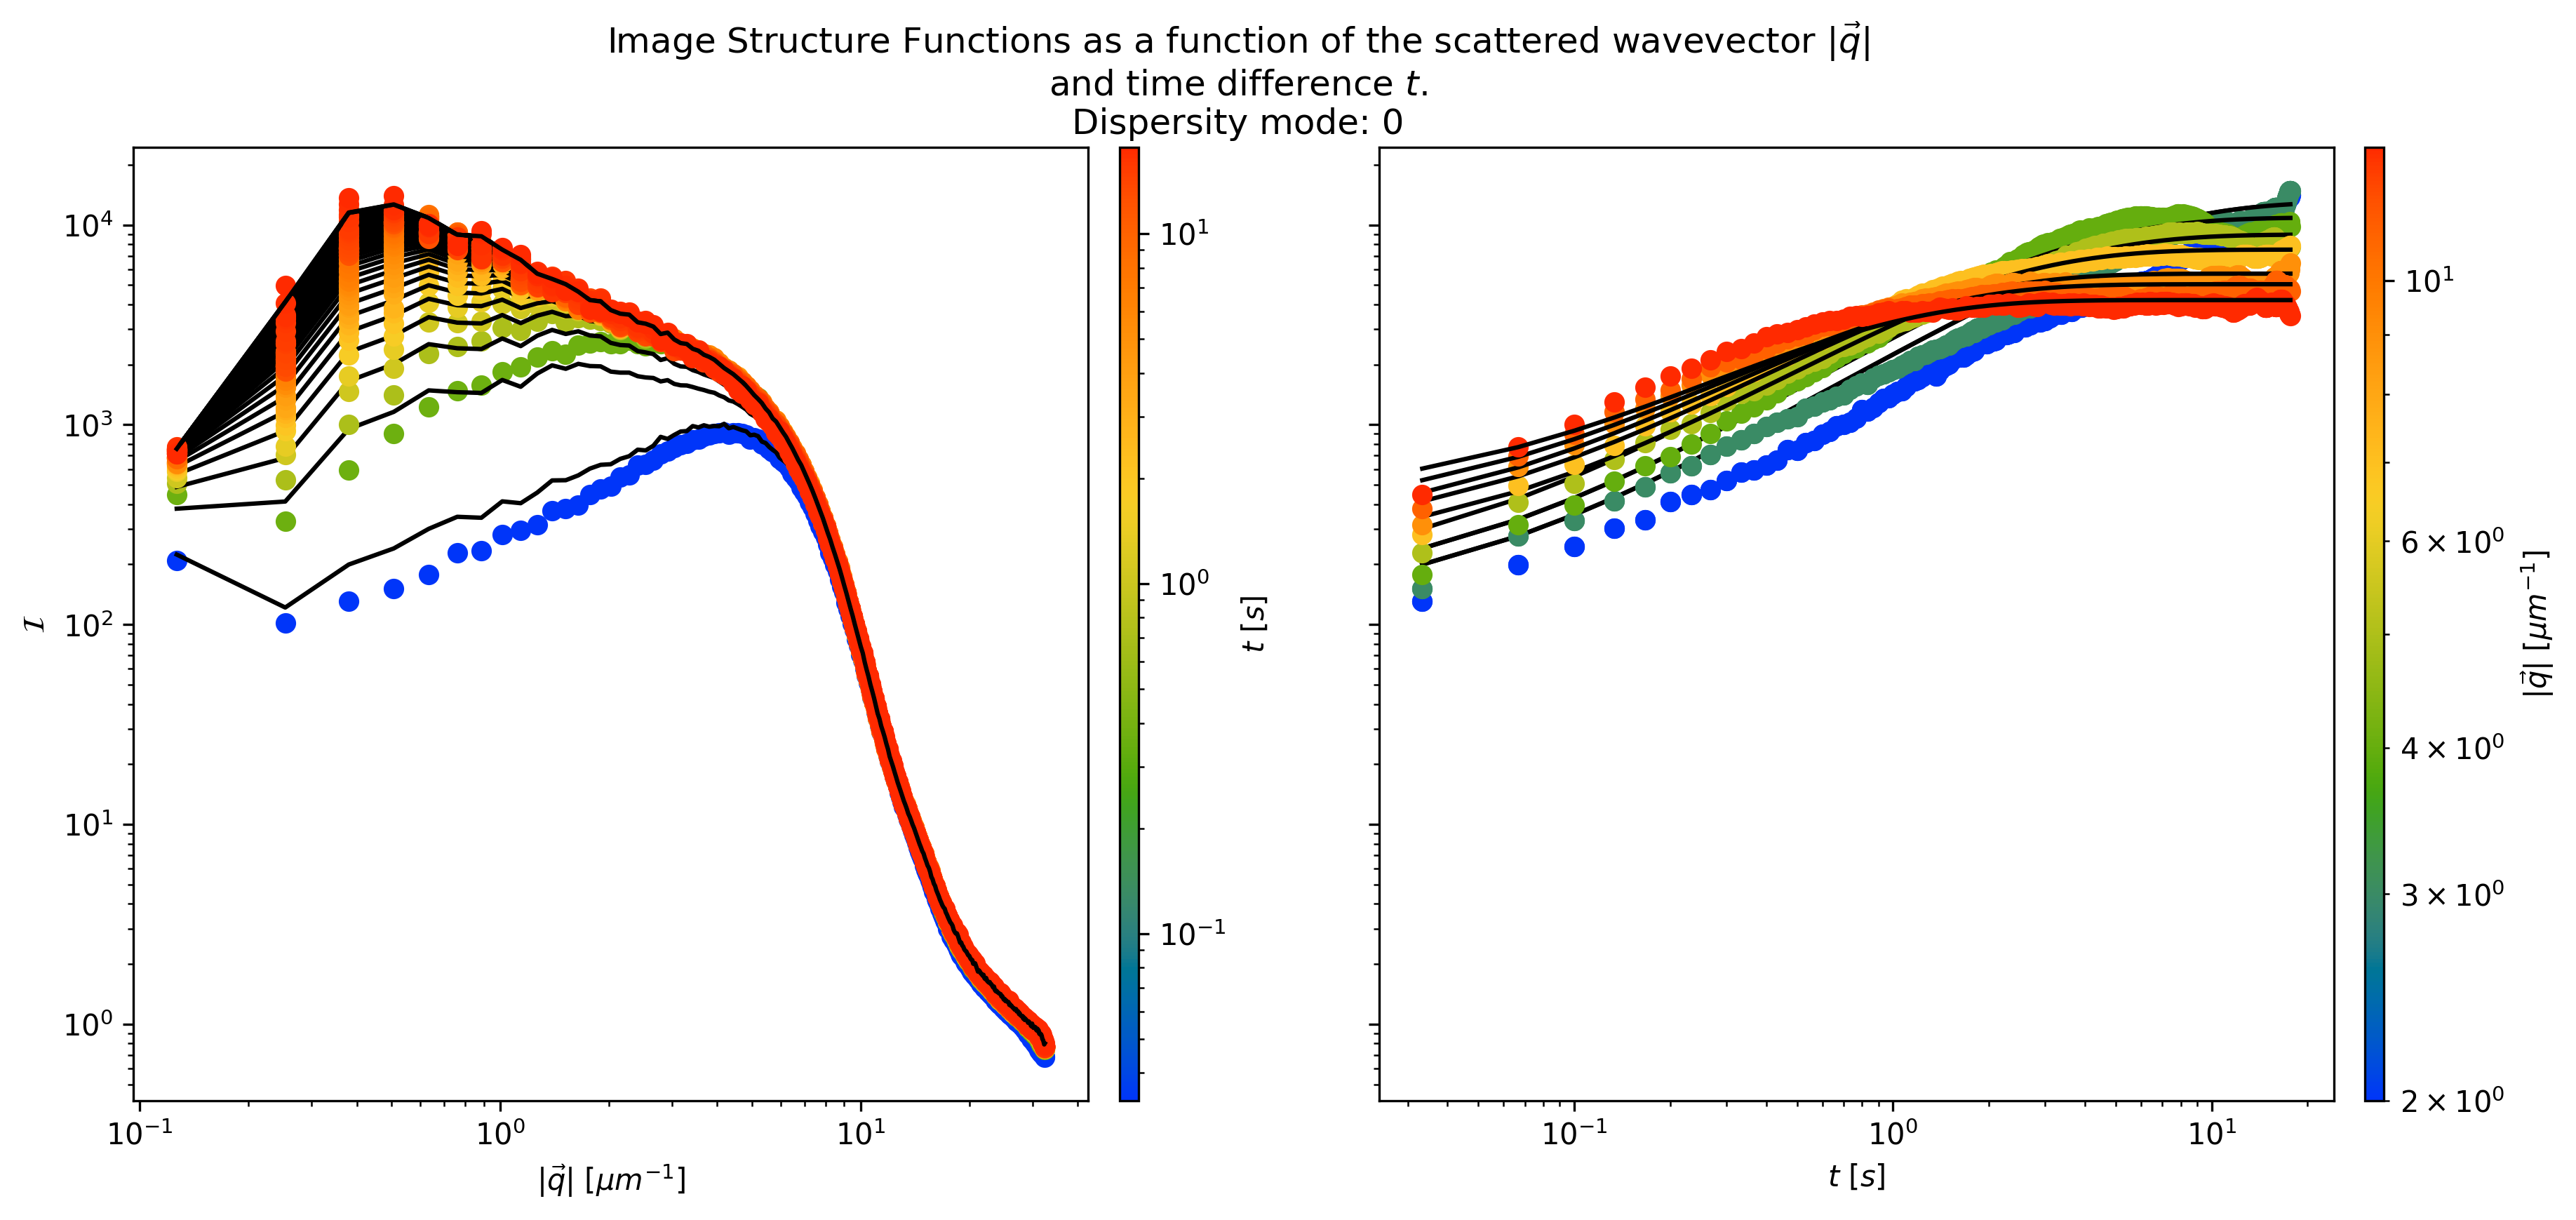

In [24]:
fig = fit_result.plot_image_structure_functions(q_interval=10)

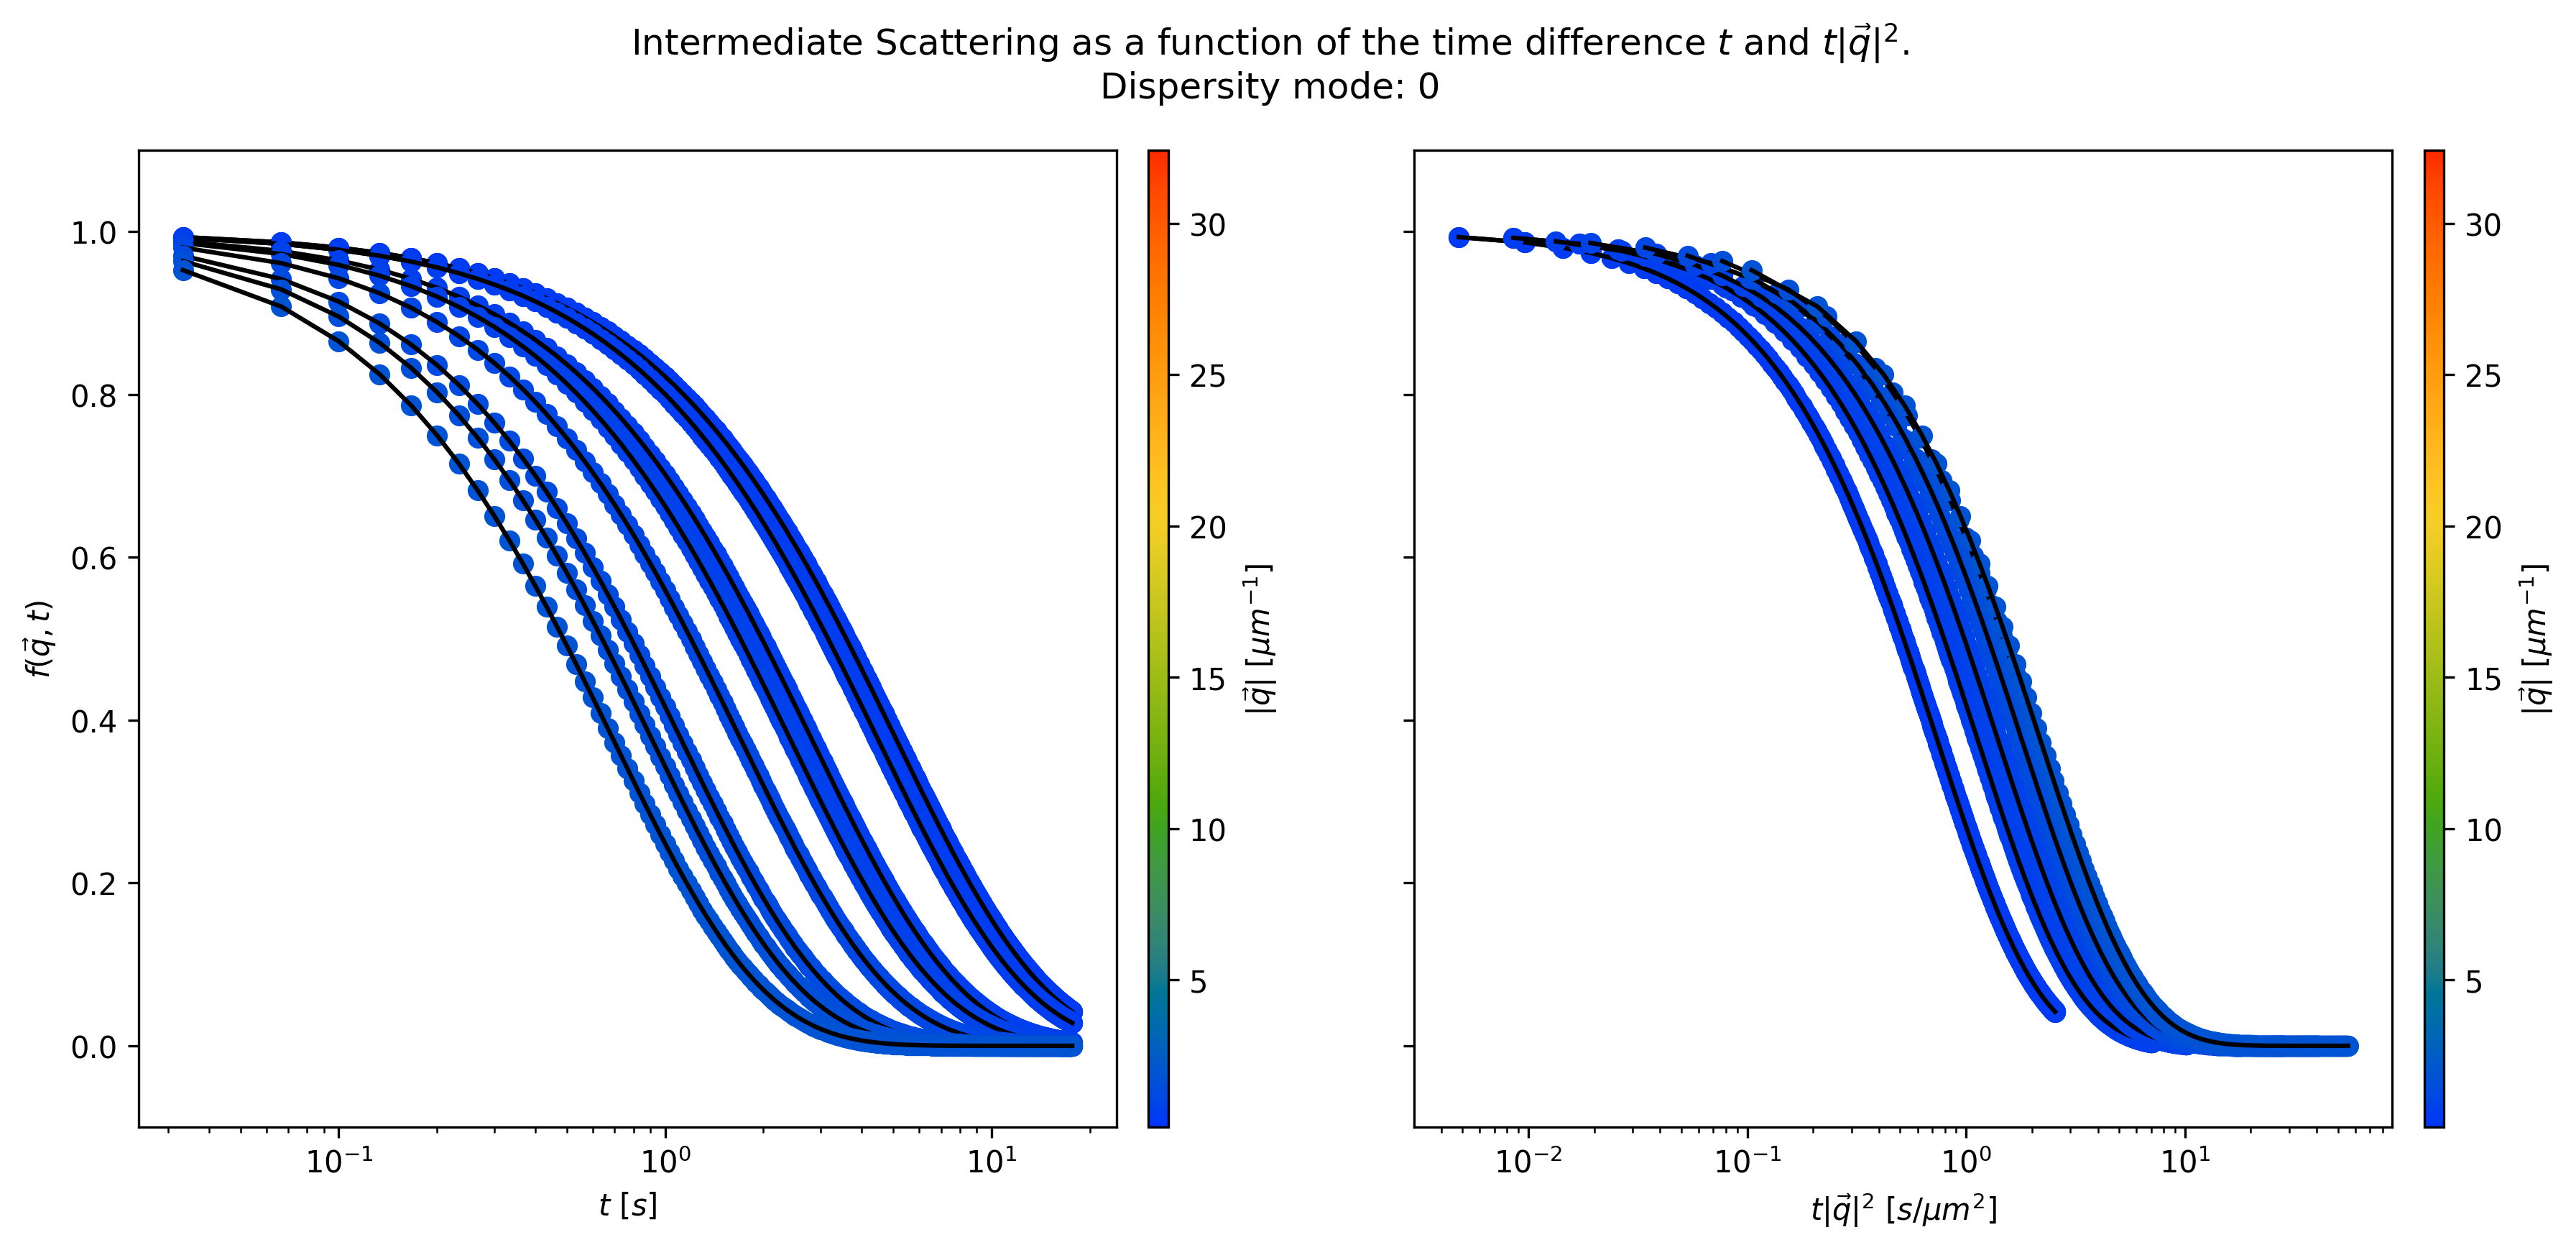

In [25]:
fig = fit_result.plot_intermediate_scattering_function(0)

In [26]:
print(fit_result.get_diffusion_coefficients())
print(fit_result.get_particle_diameters())

[0.4710326802320558+/-0.017300355296550406, 0.28929575343933706+/-0.01062541842705709]
[3.312177187466314e-06+/-1.2165152133407458e-07, 5.392902175257403e-06+/-1.980735681981312e-07]
